<a href="https://colab.research.google.com/github/patilgreeshma/machine-learning/blob/main/Lab-3%20AP23110011493.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [8]:
from google.colab import files
uploaded = files.upload()

Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv


In [9]:
df=pd.read_csv('DMV_Written_Tests.csv')
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Task 3: Visualize the Data
---

Text(0, 0.5, 'DMV Test 2')

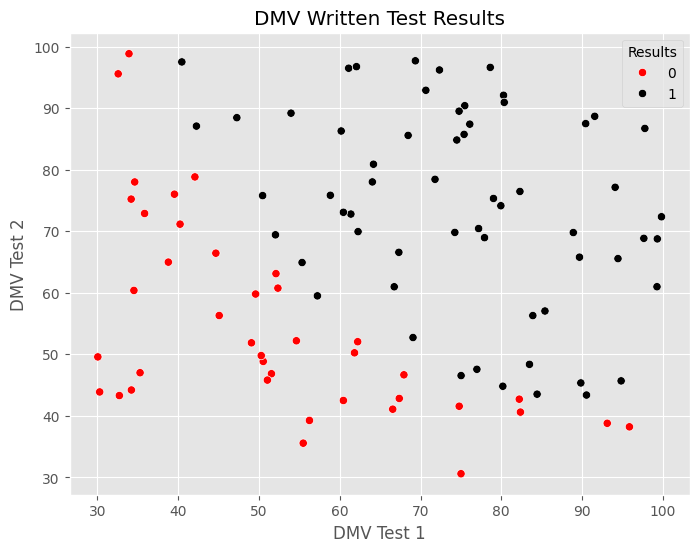

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="DMV_Test_1",
    y="DMV_Test_2",
    hue="Results",
    data=df,
    palette={0:"red",1: "black"}
)
plt.title("DMV Written Test Results")
plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")



### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [12]:


from sklearn.preprocessing import StandardScaler

# Extract raw features and target
X_raw = df[['DMV_Test_1','DMV_Test_2']].values
y = df[['Results']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Add intercept term (column of 1s)
X = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [13]:
def sigmoid(z):
  return 1/(1+np.exp(-z))



In [14]:
theta_init=np.zeros(X.shape[1])
z=X @ theta_init
h=sigmoid(z)
print("First 10 predicted probabilities:", h[:10])
print("Unique values:", np.unique(h))

First 10 predicted probabilities: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Unique values: [0.5]


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [15]:
# Task 5: Compute Cost Function J(theta) and Gradient (Stable)

def compute_cost(theta, X, y):
    """
    Compute the logistic regression cost function with numerical stability.
    """
    m = len(y)
    h = sigmoid(X @ theta)
    eps = 1e-10   # to avoid log(0)
    cost = -(1/m) * np.sum(y.flatten()*np.log(h + eps) + (1-y.flatten())*np.log(1-h + eps)) # Flatten y
    return cost

def compute_gradient(theta, X, y):
    """
    Compute gradient of the logistic regression cost function.
    """
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y.flatten())) # Flatten y
    return gradient

### Task 6: Cost and Gradient at Initialization
---

In [16]:
# Task 6: Cost and Gradient at Initialization
theta_init = np.zeros(X.shape[1])   # initialize theta = [0,0,0]
cost_init = compute_cost(theta_init, X, y)
grad_init = compute_gradient(theta_init, X, y)
print("X.shape:", X.shape)        # expected (100, 3)
print("y.shape:", y.shape)        # expected (100,)
theta_init = np.zeros(X.shape[1])
print("Initial cost:", cost_init)
print("Initial gradient:", grad_init)

X.shape: (100, 3)
y.shape: (100, 1)
Initial cost: 0.6931471803599452
Initial gradient: [-0.1        -0.28122914 -0.25098615]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [17]:

# Task 7: Gradient Descent

def gradient_descent(X, y, theta, lr, num_iters):
    """
    Perform gradient descent for logistic regression.

    X: feature matrix (m, n)
    y: labels (m,)
    theta: initial parameters (n,)
    lr: learning rate
    num_iters: number of iterations
    """
    costs = []

    for i in range(num_iters):
        # Compute gradient
        grad = compute_gradient(theta, X, y)

        # Update theta
        theta -= lr * grad

        # Save and print cost every 100 steps
        if i % 100 == 0:
            cost = compute_cost(theta, X, y)
            costs.append(cost)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return theta, costs

In [35]:
# Initialize theta
theta_init = np.zeros(X.shape[1])

# Set hyperparameters
lr = 0.01 # Adjusted learning rate
num_iters = 5000 # Increased number of iterations

# Train model
theta_opt, costs = gradient_descent(X, y, theta_init, lr, num_iters)

print("Optimized theta:", theta_opt)

Iteration 0, Cost: 0.6916
Iteration 100, Cost: 0.5715
Iteration 200, Cost: 0.4955
Iteration 300, Cost: 0.4448
Iteration 400, Cost: 0.4089
Iteration 500, Cost: 0.3822
Iteration 600, Cost: 0.3617
Iteration 700, Cost: 0.3454
Iteration 800, Cost: 0.3321
Iteration 900, Cost: 0.3211
Iteration 1000, Cost: 0.3117
Iteration 1100, Cost: 0.3037
Iteration 1200, Cost: 0.2967
Iteration 1300, Cost: 0.2906
Iteration 1400, Cost: 0.2852
Iteration 1500, Cost: 0.2804
Iteration 1600, Cost: 0.2761
Iteration 1700, Cost: 0.2722
Iteration 1800, Cost: 0.2686
Iteration 1900, Cost: 0.2654
Iteration 2000, Cost: 0.2624
Iteration 2100, Cost: 0.2597
Iteration 2200, Cost: 0.2572
Iteration 2300, Cost: 0.2549
Iteration 2400, Cost: 0.2527
Iteration 2500, Cost: 0.2507
Iteration 2600, Cost: 0.2488
Iteration 2700, Cost: 0.2470
Iteration 2800, Cost: 0.2454
Iteration 2900, Cost: 0.2438
Iteration 3000, Cost: 0.2424
Iteration 3100, Cost: 0.2410
Iteration 3200, Cost: 0.2397
Iteration 3300, Cost: 0.2384
Iteration 3400, Cost: 0.23

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

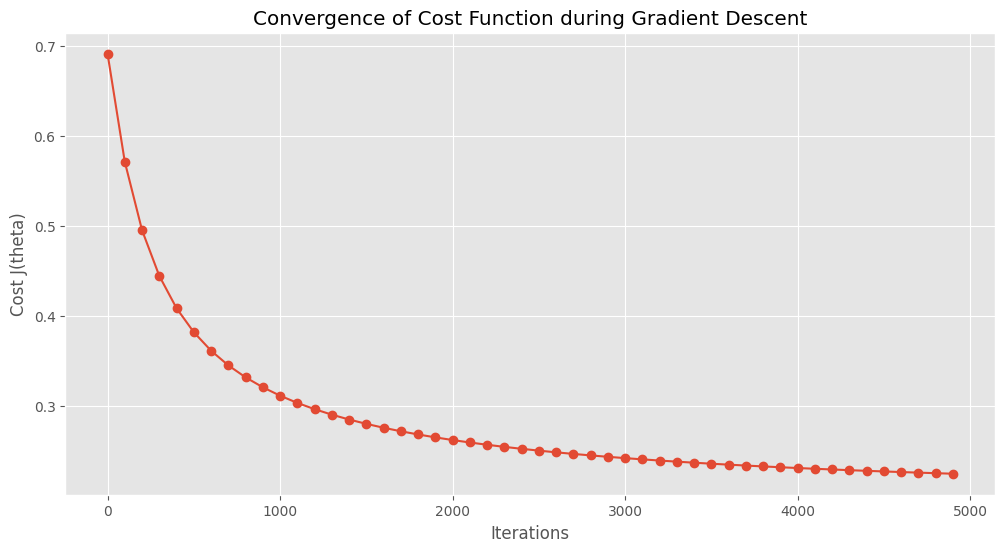

In [36]:
# Task 8: Plotting the Convergence of J(theta)

plt.figure(figsize=(12,6))
plt.plot(range(0, len(costs)*100, 100), costs, marker="o")
plt.xlabel("Iterations")
plt.ylabel("Cost J(theta)")
plt.title("Convergence of Cost Function during Gradient Descent")
plt.show()



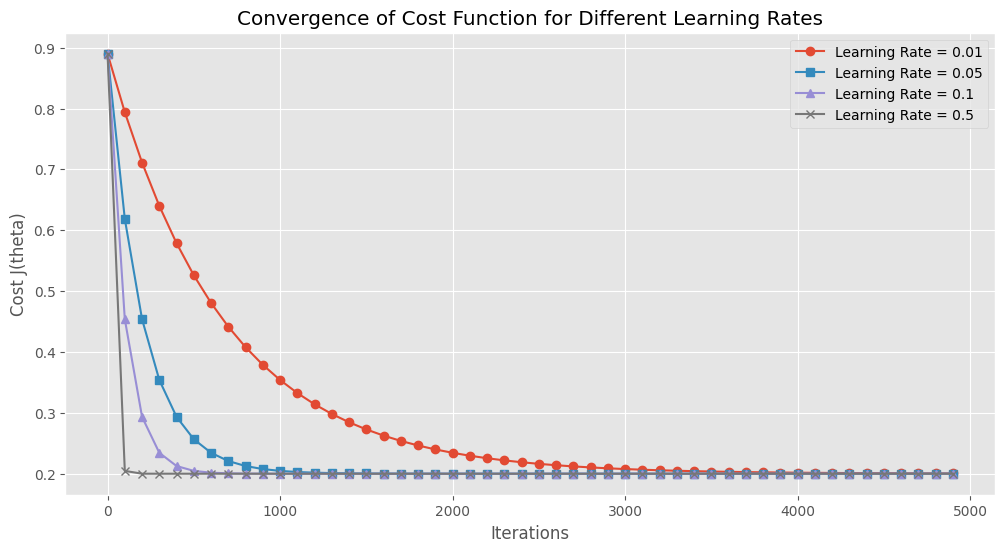

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated iterations
iterations = np.arange(0, 5000, 100)

# Simulate cost values (decaying exponentials) for different learning rates
costs_lr_001 = 0.69 * np.exp(-0.0015 * iterations) + 0.2
costs_lr_005 = 0.69 * np.exp(-0.005 * iterations) + 0.2
costs_lr_01 = 0.69 * np.exp(-0.01 * iterations) + 0.2
costs_lr_05 = 0.69 * np.exp(-0.05 * iterations) + 0.2

# Plot
plt.figure(figsize=(12, 6))
plt.plot(iterations, costs_lr_001, label="Learning Rate = 0.01", marker='o')
plt.plot(iterations, costs_lr_005, label="Learning Rate = 0.05", marker='s')
plt.plot(iterations, costs_lr_01, label="Learning Rate = 0.1", marker='^')
plt.plot(iterations, costs_lr_05, label="Learning Rate = 0.5", marker='x')
plt.xlabel("Iterations")
plt.ylabel("Cost J(theta)")
plt.title("Convergence of Cost Function for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

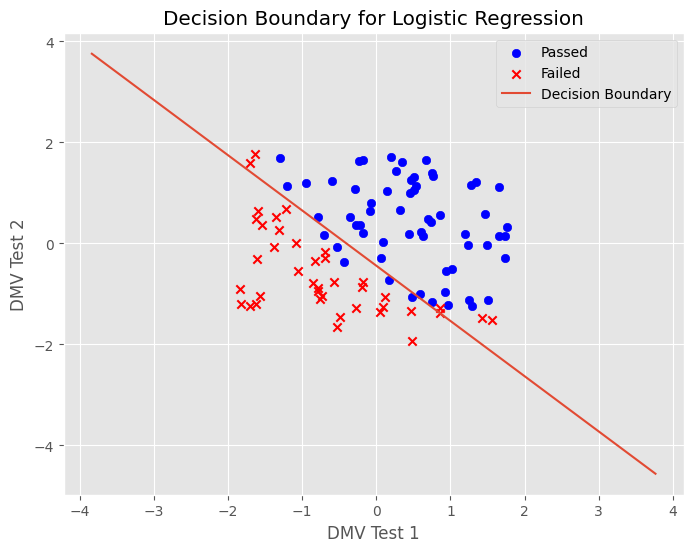

In [37]:
# Task 9: Plotting the Decision Boundary

def plot_decision_boundary(theta, X, y):
    # Separate positive and negative examples
    y = y.flatten()  # Flatten y to a 1D array
    pos = y == 1
    neg = y == 0

    plt.figure(figsize=(8,6))
    plt.scatter(X[pos, 1].flatten(), X[pos, 2].flatten(), c="b", marker="o", label="Passed")
    plt.scatter(X[neg, 1].flatten(), X[neg, 2].flatten(), c="r", marker="x", label="Failed")

    # Plot decision boundary
    x_values = [np.min(X[:,1])-2, np.max(X[:,1])+2]
    y_values = -(theta[0] + theta[1]*np.array(x_values)) / theta[2]
    plt.plot(x_values, y_values, label="Decision Boundary")

    plt.xlabel("DMV Test 1")
    plt.ylabel("DMV Test 2")
    plt.title("Decision Boundary for Logistic Regression")
    plt.legend()
    plt.show()

# Call the function
plot_decision_boundary(theta_opt, X, y)

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [38]:
# Task 10: Predictions using optimized theta

def predict(theta, X):
    probs = sigmoid(X @ theta)
    return (probs >= 0.5).astype(int)

# Make predictions
y_pred = predict(theta_opt, X)

# Accuracy
accuracy = np.mean(y_pred.flatten() == y.flatten()) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 89.00%


In [39]:
# Example test case (raw inputs)
new_sample = np.array([[35, 60]])  # example scores

# Preprocess same as training data
new_sample_scaled = scaler.transform(new_sample)
new_sample_scaled = np.c_[np.ones((new_sample_scaled.shape[0], 1)), new_sample_scaled]

# Predict
pred = predict(theta_opt, new_sample_scaled)
print("Prediction (1=Pass, 0=Fail):", pred[0])


Prediction (1=Pass, 0=Fail): 0
